In [1]:
import os
import math
import dill
from itertools import permutations

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from matplotlib import gridspec
from sklearn.linear_model import HuberRegressor as hubreg
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from pingouin import mixed_anova, anova, pairwise_tukey


import suite2p as s2p

import TwoPUtils as tpu
import STX3KO_analyses as stx
from STX3KO_analyses import utilities as u
from STX3KO_analyses.single_cell_stats import CellStats 

ko_mice = stx.ymaze_sess_deets.ko_mice
ctrl_mice = stx.ymaze_sess_deets.ctrl_mice


%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
figdir = "/mnt/BigDisk/YMazeResults/neural/wta_comparisons"
os.makedirs(figdir,exist_ok=True)

In [3]:
sess = u.load_single_day(ko_mice[0],0)

{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 6, 'scan': 14, 'novel_arm': -1, 'ravel_ind': 1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.1/28_09_2020/YMaze_LNovel/YMaze_LNovel_006_014.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.1/28_09_2020/YMaze_LNovel/YMaze_LNovel_006_014.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


In [4]:
sess.trial_info
sess.novel_arm

-1

In [5]:
fam_cell_stats = CellStats(fam=True)

{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 6, 'scan': 14, 'novel_arm': -1, 'ravel_ind': 1}
{'date': '29_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 2}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.1/29_09_2020/YMaze_LNovel/YMaze_LNovel_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.1/29_09_2020/YMaze_LNovel/YMaze_LNovel_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '30_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 'ravel_ind': 3}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.1/30_09_2020/YMaze_LNovel/YMaze_LNovel_001_004.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.1/30_09_2020/YMaze_LNovel/YMaze_LNovel_001_004.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '01_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 4}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.1/01_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.1/01_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '02_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 5}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.1/02_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.1/02_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 6}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.1/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.1/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 3, 'scan': 8, 'novel_arm': 1, 'ravel_ind': 0}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/28_09_2020/YMaze_LNovel/YMaze_LNovel_003_008.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/28_09_2020/YMaze_LNovel/YMaze_LNovel_003_008.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '29_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': 1, 'ravel_ind': 1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/29_09_2020/YMaze_LNovel/YMaze_LNovel_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/29_09_2020/YMaze_LNovel/YMaze_LNovel_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '30_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': 1, 'ravel_ind': 2}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/30_09_2020/YMaze_LNovel/YMaze_LNovel_001_004.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/30_09_2020/YMaze_LNovel/YMaze_LNovel_001_004.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '01_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': 1, 'ravel_ind': 3}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/01_10_2020/YMaze_LNovel/YMaze_LNovel_001_004.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/01_10_2020/YMaze_LNovel/YMaze_LNovel_001_004.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '02_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 9, 'novel_arm': 1, 'ravel_ind': 4}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/02_10_2020/YMaze_LNovel/YMaze_LNovel_001_009.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/02_10_2020/YMaze_LNovel/YMaze_LNovel_001_009.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 8, 'novel_arm': 1, 'ravel_ind': 5}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 'ravel_ind': 0}
{'date': '29_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 'ravel_ind': 1}
{'date': '30_09_2020', 'scene': 'YMaze_LNovel', 'session': 2, 'scan': 7, 'novel_arm': -1, 'ravel_ind': 2}
{'date': '01_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 7, 'novel_arm': -1, 'ravel_ind': 3}
{'date': '02_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 4}
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 6, 'novel_arm': -1, 'ravel_ind': 5}
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel_arm': 1, 'ravel_ind': 0}
{'date': '29_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': 1, 'ravel_ind': 1}
{'date': '30_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': 1, 'ravel_ind': 2}
{'date': '01_10_2020', 'scene': 'YMaze_LNovel', '

/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /media/mplitt/Backup Plus3/2P_Data/4467333.1/05_12_2020/YMaze_LNovel/YMaze_LNovel_001_002.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /media/mplitt/Backup Plus3/2P_Data/4467333.1/05_12_2020/YMaze_LNovel/YMaze_LNovel_001_002.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


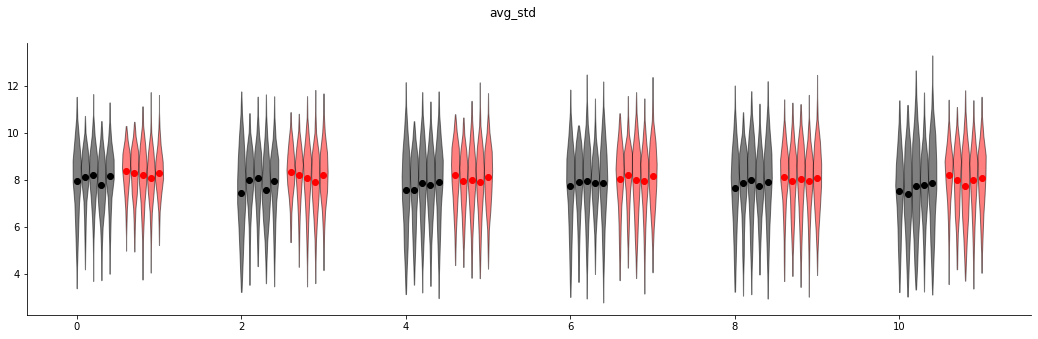

In [6]:
fig,ax = fam_cell_stats.violin_plots('avg_std')
# fig.savefig(os.path.join(figdir, 'fam_avg_std_violin.pdf'),format = 'pdf')

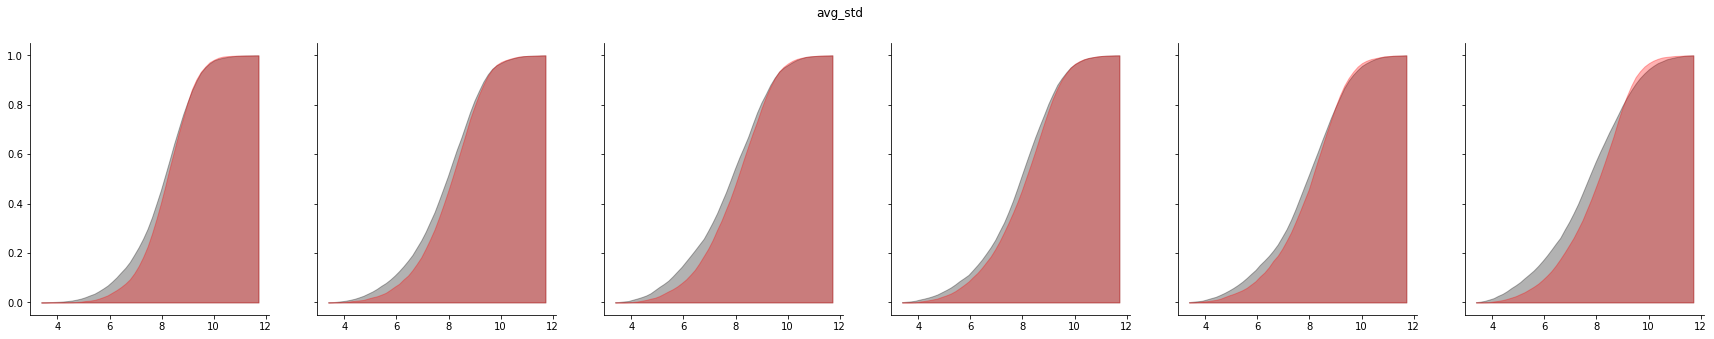

In [7]:
fig, ax = fam_cell_stats.combined_hist('avg_std', cumulative=True, smooth=True)
# fig.savefig(os.path.join(figdir, 'fam_avg_std_cumhist.pdf'),format = 'pdf')

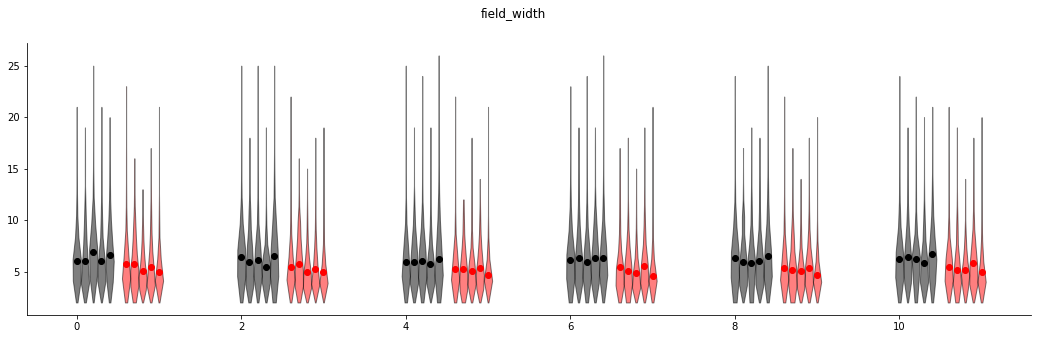

In [8]:
fig,ax = fam_cell_stats.violin_plots('field_width')
# fig.savefig(os.path.join(figdir, 'fam_field_width_violin.pdf'),format = 'pdf')

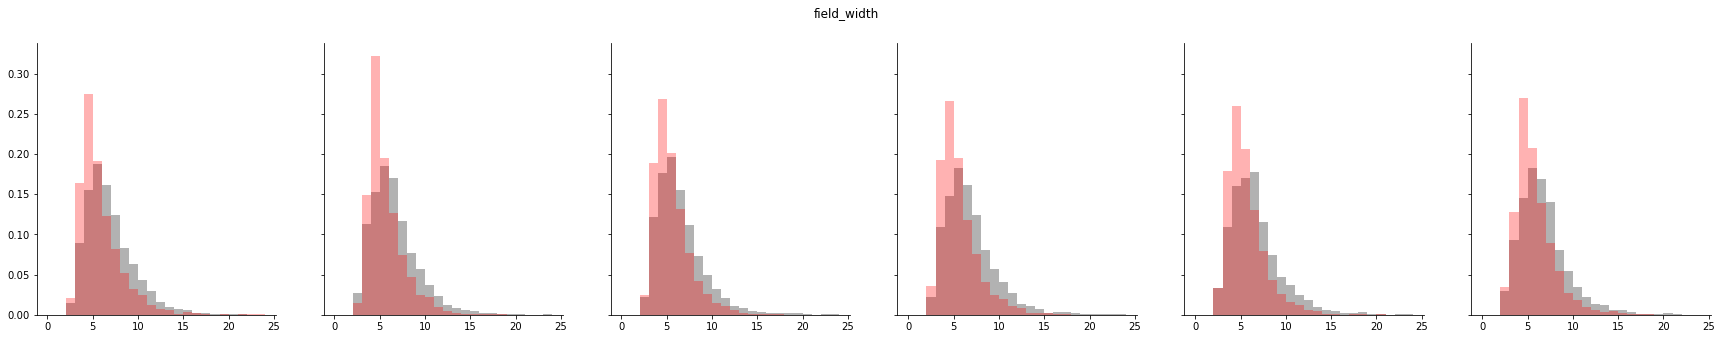

In [9]:
fig, ax = fam_cell_stats.combined_hist('field_width', cumulative=False, smooth=False, bins = np.arange(0,25))
# fig.savefig(os.path.join(figdir, 'fam_field_width_hist.pdf'),format = 'pdf')

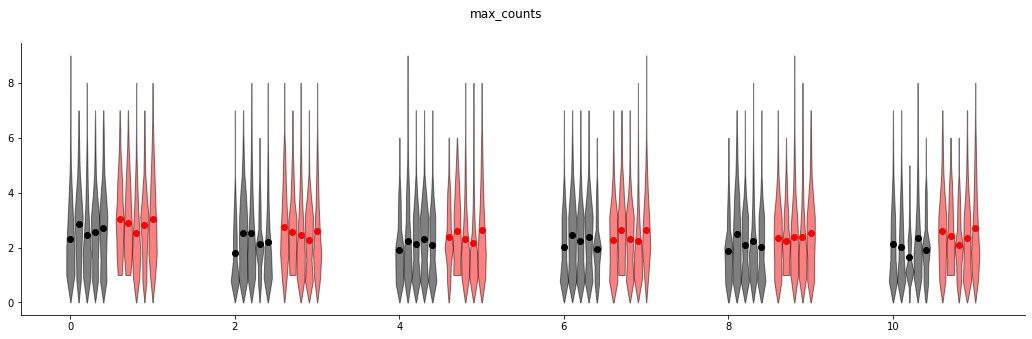

In [10]:
fig,ax = fam_cell_stats.violin_plots('max_counts')
# fig.savefig(os.path.join(figdir, 'fam_max_counts_violin.pdf'),format = 'pdf')

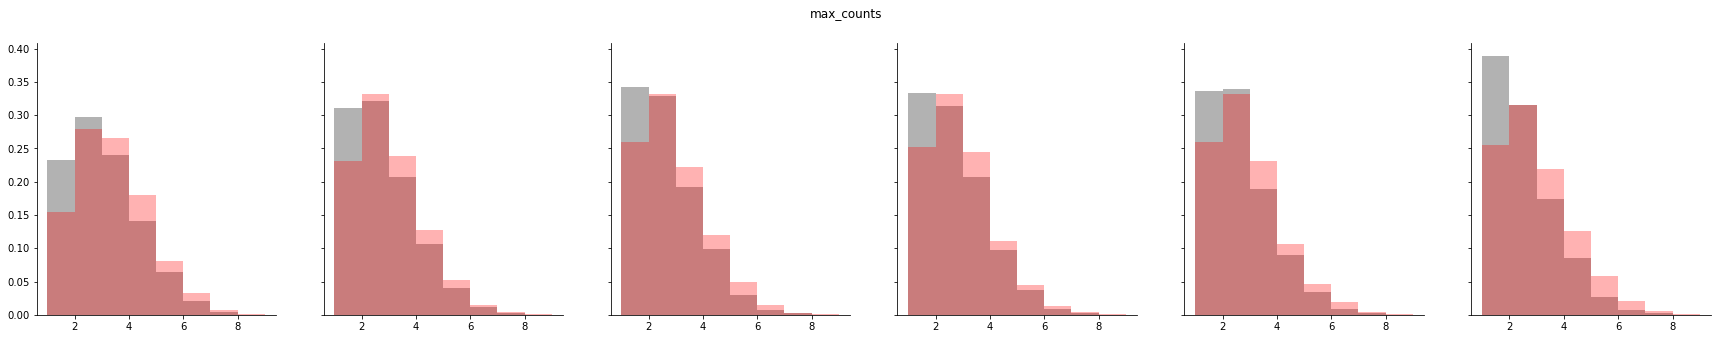

In [11]:
fig, ax = fam_cell_stats.combined_hist('max_counts', cumulative=False, smooth=False, bins = np.arange(1,10))
# fig.savefig(os.path.join(figdir, 'fam_max_counts_hist.pdf'),format = 'pdf')

In [12]:
fam_cell_stats.mixed_anova('max_counts')

Mixed design ANOVA results
        Source        SS  DF1  DF2        MS          F         p-unc  \
0      ko_ctrl  1.260215    1    8  1.260215   8.739372  1.825070e-02   
1          day  1.693055    5   40  0.338611  12.682187  2.079693e-07   
2  Interaction  0.073734    5   40  0.014747   0.552317  7.356074e-01   

        np2       eps  
0  0.522085       NaN  
1  0.613194  0.513636  
2  0.064581       NaN  
PostHoc Tukey: KO vs Ctrl
   A  B   mean(A)  mean(B)      diff        se         T  p-tukey    hedges
0  0  1  2.508093  2.21824  0.289852  0.067708  4.280932    0.001  1.090977
PostHov Tukey on each day
Day 0
   A  B   mean(A)   mean(B)      diff        se         T   p-tukey   hedges
0  0  1  2.862771  2.581563  0.281208  0.134042  2.097908  0.069162  1.19843
Day 1
   A  B   mean(A)   mean(B)      diff        se         T   p-tukey    hedges
0  0  1  2.531112  2.233077  0.298036  0.156766  1.901149  0.093802  1.086032
Day 2
   A  B   mean(A)   mean(B)      diff        se     

{'anova':         Source        SS  DF1  DF2        MS          F         p-unc  \
 0      ko_ctrl  1.260215    1    8  1.260215   8.739372  1.825070e-02   
 1          day  1.693055    5   40  0.338611  12.682187  2.079693e-07   
 2  Interaction  0.073734    5   40  0.014747   0.552317  7.356074e-01   
 
         np2       eps  
 0  0.522085       NaN  
 1  0.613194  0.513636  
 2  0.064581       NaN  ,
 'ko_ctrl_tukey':    A  B   mean(A)  mean(B)      diff        se         T  p-tukey    hedges
 0  0  1  2.508093  2.21824  0.289852  0.067708  4.280932    0.001  1.090977,
 'day_tukey': [   A  B   mean(A)   mean(B)      diff        se         T   p-tukey   hedges
  0  0  1  2.862771  2.581563  0.281208  0.134042  2.097908  0.069162  1.19843,
     A  B   mean(A)   mean(B)      diff        se         T   p-tukey    hedges
  0  0  1  2.531112  2.233077  0.298036  0.156766  1.901149  0.093802  1.086032,
     A  B   mean(A)   mean(B)      diff        se         T   p-tukey    hedges
  0  0 

/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/single_cell_stats.py:304: RuntimeWarning: Mean of empty slice
  ko_mu, ko_sem = np.nanmean(ko_mu_arr, axis=0), sp.stats.sem(ko_mu_arr, axis=0, nan_policy='omit')
/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/single_cell_stats.py:305: RuntimeWarning: Mean of empty slice
  ctrl_mu, ctrl_sem = np.nanmean(ctrl_mu_arr, axis=0), sp.stats.sem(ctrl_mu_arr, axis=0, nan_policy='omit')


(<Figure size 2160x720 with 12 Axes>,
 array([[<AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>],
        [<AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>]], dtype=object))

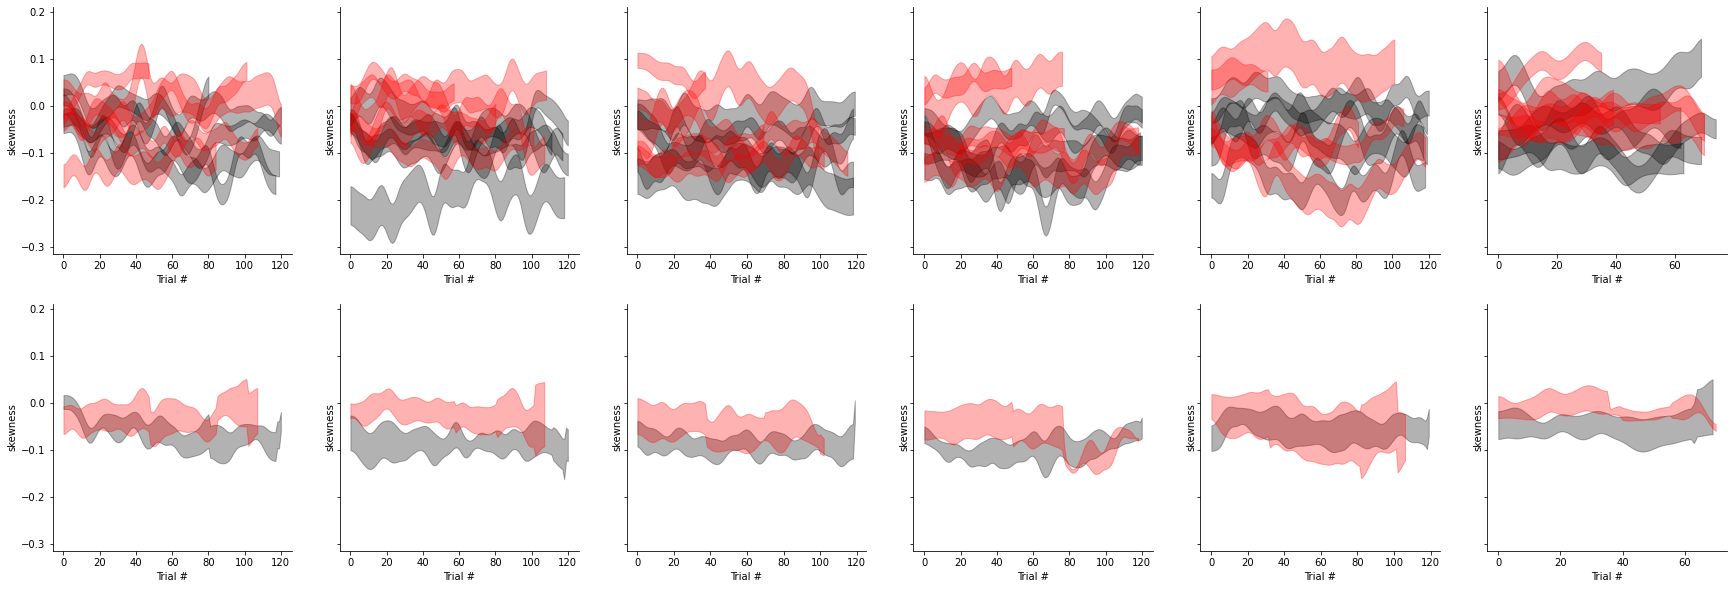

In [13]:
fam_cell_stats.across_trial_plot('skewness')

In [4]:
nov_cell_stats = CellStats(fam=False)

{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 6, 'scan': 14, 'novel_arm': -1, 'ravel_ind': 1}
{'date': '29_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 2}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.1/29_09_2020/YMaze_LNovel/YMaze_LNovel_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.1/29_09_2020/YMaze_LNovel/YMaze_LNovel_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '30_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 'ravel_ind': 3}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.1/30_09_2020/YMaze_LNovel/YMaze_LNovel_001_004.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.1/30_09_2020/YMaze_LNovel/YMaze_LNovel_001_004.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '01_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 4}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.1/01_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.1/01_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '02_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 5}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.1/02_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.1/02_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 6}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.1/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.1/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 3, 'scan': 8, 'novel_arm': 1, 'ravel_ind': 0}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/28_09_2020/YMaze_LNovel/YMaze_LNovel_003_008.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/28_09_2020/YMaze_LNovel/YMaze_LNovel_003_008.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '29_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': 1, 'ravel_ind': 1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/29_09_2020/YMaze_LNovel/YMaze_LNovel_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/29_09_2020/YMaze_LNovel/YMaze_LNovel_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '30_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': 1, 'ravel_ind': 2}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/30_09_2020/YMaze_LNovel/YMaze_LNovel_001_004.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/30_09_2020/YMaze_LNovel/YMaze_LNovel_001_004.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '01_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': 1, 'ravel_ind': 3}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/01_10_2020/YMaze_LNovel/YMaze_LNovel_001_004.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/01_10_2020/YMaze_LNovel/YMaze_LNovel_001_004.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '02_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 9, 'novel_arm': 1, 'ravel_ind': 4}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/02_10_2020/YMaze_LNovel/YMaze_LNovel_001_009.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/02_10_2020/YMaze_LNovel/YMaze_LNovel_001_009.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 8, 'novel_arm': 1, 'ravel_ind': 5}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 'ravel_ind': 0}
{'date': '29_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 'ravel_ind': 1}
{'date': '30_09_2020', 'scene': 'YMaze_LNovel', 'session': 2, 'scan': 7, 'novel_arm': -1, 'ravel_ind': 2}
{'date': '01_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 7, 'novel_arm': -1, 'ravel_ind': 3}
{'date': '02_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 4}
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 6, 'novel_arm': -1, 'ravel_ind': 5}
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel_arm': 1, 'ravel_ind': 0}
{'date': '29_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': 1, 'ravel_ind': 1}
{'date': '30_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': 1, 'ravel_ind': 2}
{'date': '01_10_2020', 'scene': 'YMaze_LNovel', '

/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /media/mplitt/Backup Plus3/2P_Data/4467333.1/05_12_2020/YMaze_LNovel/YMaze_LNovel_001_002.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /media/mplitt/Backup Plus3/2P_Data/4467333.1/05_12_2020/YMaze_LNovel/YMaze_LNovel_001_002.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


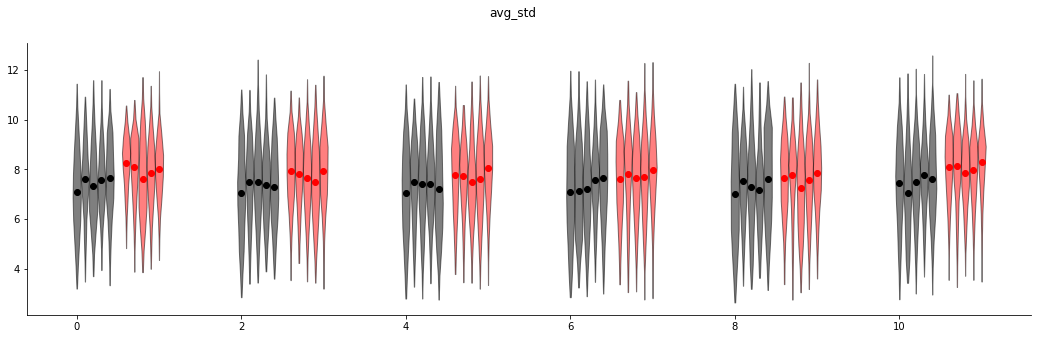

In [5]:
fig,ax = nov_cell_stats.violin_plots('avg_std')
# fig.savefig(os.path.join(figdir, 'nov_avg_std_violin.pdf'),format = 'pdf')

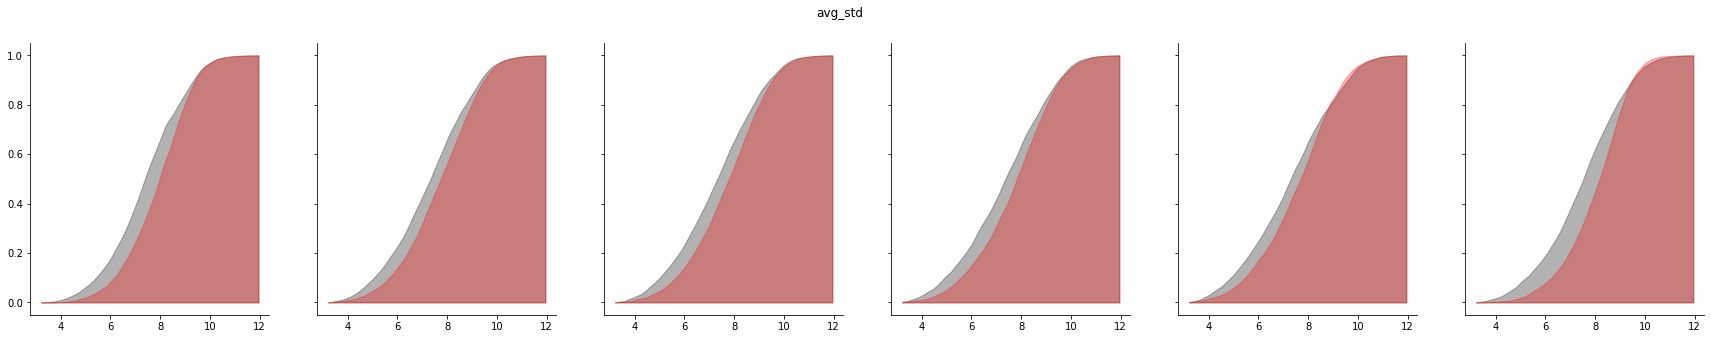

In [6]:
fig, ax = nov_cell_stats.combined_hist('avg_std', cumulative=True, smooth=True)
# fig.savefig(os.path.join(figdir, 'nov_avg_std_cumhist.pdf'),format = 'pdf')

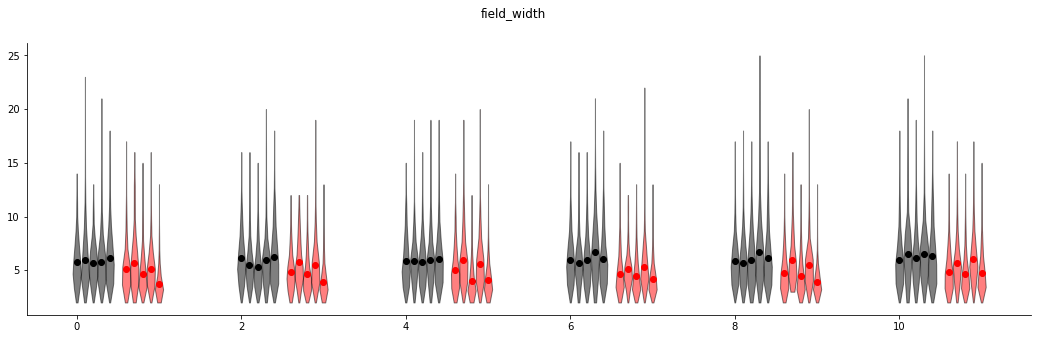

In [7]:
fig,ax = nov_cell_stats.violin_plots('field_width')
# fig.savefig(os.path.join(figdir, 'nov_field_width_violin.pdf'),format = 'pdf')

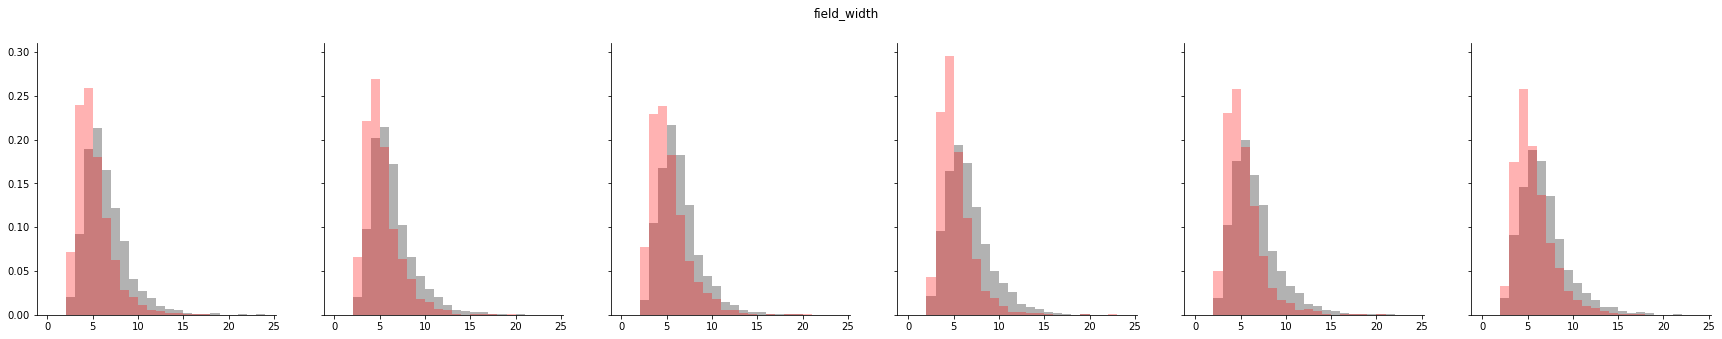

In [8]:
fig, ax = nov_cell_stats.combined_hist('field_width', cumulative=False, smooth=False, bins = np.arange(0,25))
# fig.savefig(os.path.join(figdir, 'nov_field_width_hist.pdf'),format = 'pdf')

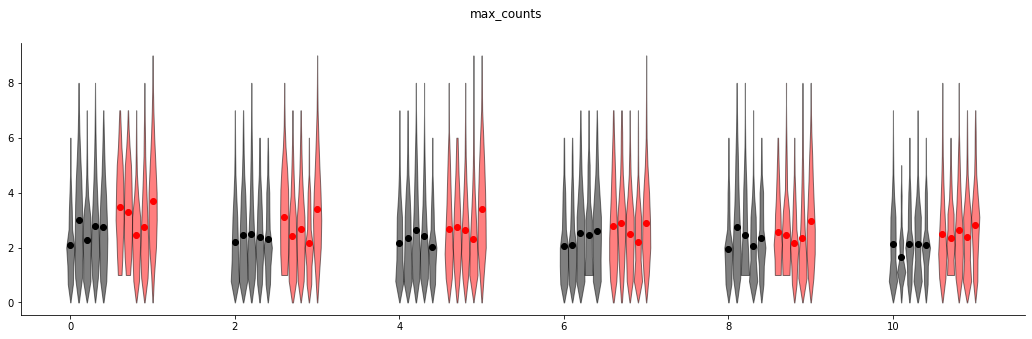

In [9]:
fig,ax = nov_cell_stats.violin_plots('max_counts')
# fig.savefig(os.path.join(figdir, 'nov_max_counts_violin.pdf'),format = 'pdf')

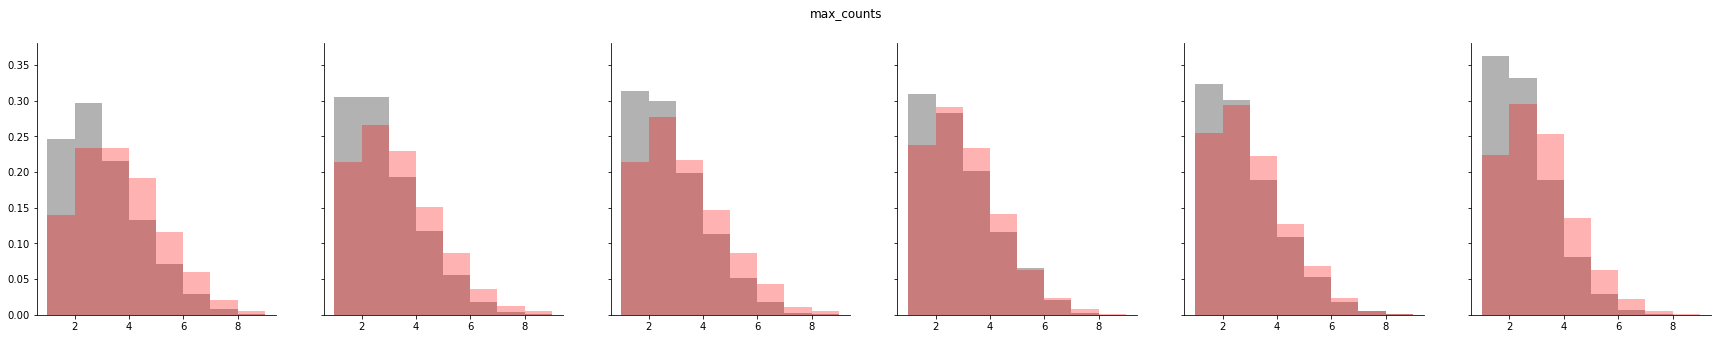

In [10]:
fig, ax = nov_cell_stats.combined_hist('max_counts', cumulative=False, smooth=False, bins = np.arange(1,10))
# fig.savefig(os.path.join(figdir, 'nov_max_counts_hist.pdf'),format = 'pdf')

In [11]:
nov_cell_stats.mixed_anova('max_counts')

Mixed design ANOVA results
        Source        SS  DF1  DF2        MS         F     p-unc       np2  \
0      ko_ctrl  2.299872    1    8  2.299872  6.171744  0.037857  0.435496   
1          day  1.810646    5   40  0.362129  6.035250  0.000299  0.430007   
2  Interaction  0.231254    5   40  0.046251  0.770815  0.576418  0.087884   

       eps  
0      NaN  
1  0.65688  
2      NaN  
PostHoc Tukey: KO vs Ctrl
   A  B   mean(A)   mean(B)      diff        se         T  p-tukey    hedges
0  0  1  2.720755  2.329188  0.391567  0.092371  4.239079    0.001  1.080311
PostHov Tukey on each day
Day 0
   A  B  mean(A)  mean(B)      diff        se        T   p-tukey    hedges
0  0  1  3.13465  2.57588  0.558771  0.285973  1.95393  0.086465  1.116183
Day 1
   A  B   mean(A)   mean(B)      diff        se         T   p-tukey    hedges
0  0  1  2.747632  2.368539  0.379093  0.233108  1.626256  0.142548  0.928999
Day 2
   A  B   mean(A)   mean(B)      diff        se         T  p-tukey   hedges
0 

{'anova':         Source        SS  DF1  DF2        MS         F     p-unc       np2  \
 0      ko_ctrl  2.299872    1    8  2.299872  6.171744  0.037857  0.435496   
 1          day  1.810646    5   40  0.362129  6.035250  0.000299  0.430007   
 2  Interaction  0.231254    5   40  0.046251  0.770815  0.576418  0.087884   
 
        eps  
 0      NaN  
 1  0.65688  
 2      NaN  ,
 'ko_ctrl_tukey':    A  B   mean(A)   mean(B)      diff        se         T  p-tukey    hedges
 0  0  1  2.720755  2.329188  0.391567  0.092371  4.239079    0.001  1.080311,
 'day_tukey': [   A  B  mean(A)  mean(B)      diff        se        T   p-tukey    hedges
  0  0  1  3.13465  2.57588  0.558771  0.285973  1.95393  0.086465  1.116183,
     A  B   mean(A)   mean(B)      diff        se         T   p-tukey    hedges
  0  0  1  2.747632  2.368539  0.379093  0.233108  1.626256  0.142548  0.928999,
     A  B   mean(A)   mean(B)      diff        se         T  p-tukey   hedges
  0  0  1  2.753949  2.319892  0.43

/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/single_cell_stats.py:304: RuntimeWarning: Mean of empty slice
  ko_mu, ko_sem = np.nanmean(ko_mu_arr, axis=0), sp.stats.sem(ko_mu_arr, axis=0, nan_policy='omit')
/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/single_cell_stats.py:305: RuntimeWarning: Mean of empty slice
  ctrl_mu, ctrl_sem = np.nanmean(ctrl_mu_arr, axis=0), sp.stats.sem(ctrl_mu_arr, axis=0, nan_policy='omit')


(<Figure size 2160x720 with 12 Axes>,
 array([[<AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>],
        [<AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>]], dtype=object))

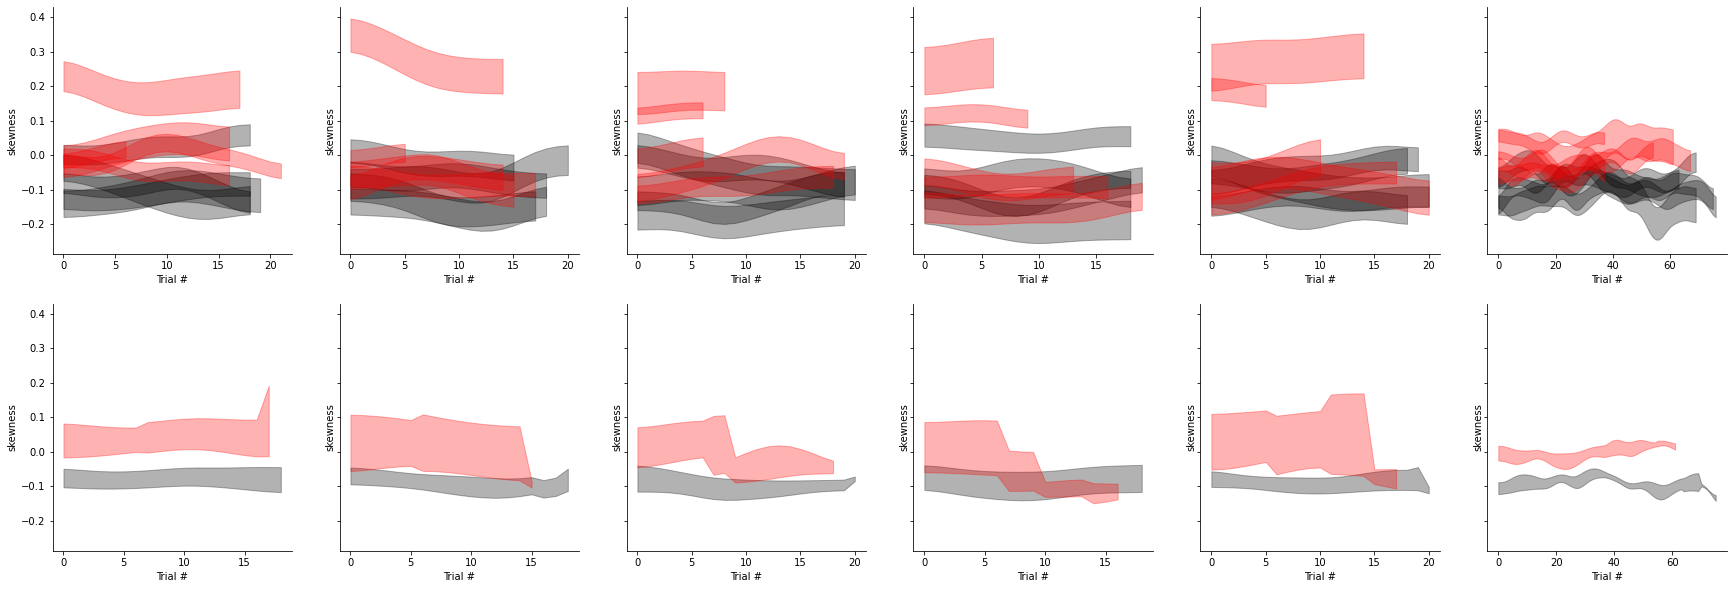

In [12]:
nov_cell_stats.across_trial_plot('skewness')